# Dicision Tree and Random Forest Models For Movie/Series Type Prediction
In this notebook, we're interested in training ML models that predict the "types" of movies/series based on a number of features that are found usefull during the preprocessing phase. This project consists of several major steps, i.e. data analysis, preprocessing, training, optimization, and prediction. We'll be training models using the dicision tree and random forest algorithms.

We essentially import packages that are needed. We then import the dataset in interest, preprocess the data, train desirable models, optimize hyperparams, and predict for test examples.

## 1 - Packages
First, we import all the python packages that we'll need during this assignment.

- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- [matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python
- [Sklearn](https://scikit-learn.org/) is a machine learning library for Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn


# Setting matplotlib plotting options
plt.rcParams['axes.titlesize'] = 12

%matplotlib inline

## 2 - Dataset
We will use a dataset of Netflix and Amazon Series/Movies. It contains the following fields and attributes:

- type 
- title 
- cast
- country
- release_year
- listed_in
- description

And we're interested in predicting the values corresponding to the type filed, given all the other attributes.

First, we read the dataset as follows:

In [2]:
df = pd.read_csv('datasets/dataset.csv')
df

,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


## 3 - Phase 0
### 3.1 - Data Description
The first step, is to get an intuition about the structural properties of the data. We do that by calling the `describe` and `info` methods on the Pandas DataFeame.

- `describe` gives an overall statistical summary of the dataset
- `info` gives a view of the column types and either presence or not of Nan/Null values

Note that mean, std, min, max, and quartiles, are only returned for numerical fields in call to `describe`.

In [3]:
df.describe(include='all')

,type,title,cast,country,release_year,listed_in,description
count,11059,11059,9694,8364,11059.000000,11059,11059
unique,2,10957,9307,760,NaN,888,10978
top,Movie,The Fosters,David Attenborough,United States,NaN,"Dramas, International Movies",1
freq,6131,2,20,3105,NaN,362,9
mean,NaN,NaN,NaN,NaN,2014.209603,NaN,NaN
std,NaN,NaN,NaN,NaN,8.959517,NaN,NaN
min,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 604.9+ KB


### 3.2 - Missing values
We're interested in the ratio of missing values in each of the coulmns within the dataset. We gain this insight as follows:

In [5]:
(df.isnull().sum(axis=0)/df.shape[0]) * 100

type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In the above implementation, the `df.isnull().sum(axis=0)`, resturn the total number of missing values along each column. We then devided it by the length of the dataset (number of examples) and multiplied the result by 100 to get the percentage.

## 4 - Phase 1
### 4.1 - Handling missing values
There are a bunch of ways out there for handling missing values in a dataset, but the two most prominent are explained below (along with their pros and cons):
1. Deletion of examples with at least on missing value
    - Pros
        - No implicit regularization/polarization imposed on the dataset
        - Results in a more robust and totally consistent dataset
    - Cons
        - Can potentially result in great amount of loss of data
        - Downgrades the number of total examples in the dataset     
2. Replacement of missing values with mean/median of the corresponding columns
    - Pros
        - Potentially saves a great bunch of data
        - Works with datasets of all sizes
    - Cons
        - Imposes an implicit regularization effect on the dataset
        - Only applicable to numerical data types
        
Here, we utilize the first approach, since it's most consistent with the types of data that is missing in the dataset. This sadly also results in a loss of nearly 4000 examples.

In [6]:
df = df.dropna()
df

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",1993,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


### 4.2 - Normalization/Standardization
There are two most common approaches to data scaling used in modern ML: normalization and standardization. Normalization typically means to reseacle the data points to lie between 0 and 1. Standardization, however, is typically about setting the data mean to 0 and standard deviation to 1.

Whether normalization or standardization is chosen, although potentially coming with significant changes in results, provides great benefits to the training process. Data rescaling could increase robustness, improve training speed, and significantly drop the risk of vanishing gradients blocking the way of learning.

Here we use normalization, as to be consistent with the way we're gonna encode our categorical columns, i.e. in onehot (1/0) encoded mode.

In [7]:
scaler = preprocessing.MinMaxScaler((0,1))
scaled = scaler.fit_transform(df[['release_year']])

df_scaled = df.copy()
df_scaled['release_year'] = scaled
df_scaled

,type,title,cast,country,release_year,listed_in,description
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,1.000000,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,1.000000,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",0.645570,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,1.000000,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,1.000000,"Comedies, Dramas",A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,0.734177,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,0.683544,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,0.911392,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,0.936709,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


### 4.3 - Categorical Data Encoding
Two most common ways of handling categorical data types, is 1) label encoding, and 2) onehot encoding. Label encoding replaces each category with labels, e.g. integers in range [0, num_of_labels], whereas onehot encoding add fields per each single category, and places a 1 where the corresponding category matches the category of the row in question, and 0's elsewhere.

Here we use onehot encoding for the `type` and `country` fields, as to be consistent with our [0, 1] scaling applied to the numerical field of `release_year`. Note that we split the list countries by commas for each row before onehot encoding them.

**Note**: We also drop the `TVShow` column, as we only care about the original `type`as a binary field, which in nature gets satisfied by only one of the `Movie` or `TVShow` columns.

In [8]:
def onehot_encode(df: pd.DataFrame, sep: str, rep: str):
    df = df.copy()
    for column in df.columns:
        if df[column].dtype == 'O':
            tmp_col = df[column].str.replace(rep, '').str.get_dummies(sep)
            df = df.drop(column, axis=1)
            df = df.join(tmp_col)
    return df

df_tmp = onehot_encode(df[['type', 'country']], sep=',', rep=' ')
df_onehot = df_tmp.join(df_scaled[['title', 'cast', 'release_year', 'description', 'listed_in']])
df_onehot = df_onehot.drop('TVShow', axis=1)
df_onehot

,Movie,Afghanistan,Albania,Algeria,Angola,Argentina,Australia,Austria,Azerbaijan,Bahamas,...,VaticanCity,Venezuela,Vietnam,WestGermany,Zimbabwe,title,cast,release_year,description,listed_in
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",1.000000,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",1.000000,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",0.645570,"On a photo shoot in Ghana, an American model s...","Dramas, Independent Movies, International Movies"
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",1.000000,A talented batch of amateur bakers face off in...,"British TV Shows, Reality TV"
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",1.000000,A woman adjusting to life after a loss contend...,"Comedies, Dramas"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",0.734177,X-Men: Evolution features the team as teenager...,"Action-Adventure, Animation, Kids"
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",0.683544,A genius tries to fit in as a high school soph...,"Comedy, Coming of Age, Kids"
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",0.911392,Welcome to Kirby's world! It's rude and sketchy.,"Action-Adventure, Comedy, Coming of Age"
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",0.936709,Ryan discovers his ability to control a giant ...,"Action-Adventure, Comedy, Science Fiction"


There are also a number of ways to manage the `liseted_in` column. The best way to manage them in here, is to approach them the very same way we approached the list of countries in each row. We seperate names by commas, and "onehot" encode them.

**Note**: What we mean here by "onehot" encoding, is more about choosing which items apply and which don't, as we're clearly not taking the consideration of having only one label "hot" per field in each row.

In [9]:
df_tmp = onehot_encode(df_onehot[['listed_in']], sep=',', rep='and')
df_onehot = df_tmp.join(df_onehot.drop('listed_in', axis=1))
df_onehot

,Culture,Animals & Nature,Animation,Anime,Anime Features,Anthology,Buddy,Children & Family Movies,Classic & Cult TV,Classic Movies,...,Uruguay,VaticanCity,Venezuela,Vietnam,WestGermany,Zimbabwe,title,cast,release_year,description
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",1.000000,"After crossing paths at a party, a Cape Town t..."
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",1.000000,In a city of coaching centers known to train I...
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",0.645570,"On a photo shoot in Ghana, an American model s..."
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,The Great British Baking Show,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",1.000000,A talented batch of amateur bakers face off in...
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",1.000000,A woman adjusting to life after a loss contend...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",0.734177,X-Men: Evolution features the team as teenager...
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",0.683544,A genius tries to fit in as a high school soph...
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",0.911392,Welcome to Kirby's world! It's rude and sketchy.
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",0.936709,Ryan discovers his ability to control a giant ...


### 4.4 - Count Vectorization for Textual Fields
Count Vectorization pretty much is the same as applying the "bag of words" model applied to the dataset. It counts each word's number of repeats in each sentence, and puts it in front of it in the correspoding field to be used later. In the following cell, we apply it using the `CountVectorizer` class from Sklearn. Note that we're using `min_df` and `max_df` arguments to limit the dimentionality of the dataset to lower values:

In [10]:
str_series = df_onehot['description'] + ' ' + df_onehot['title'] + ' ' + df_onehot['cast']

vectorizer = CountVectorizer(analyzer='word', min_df=0.02, max_df=0.6)
transformed = vectorizer.fit_transform(str_series)

cols_ser = 'desc_' + pd.Series(vectorizer.get_feature_names())
df_preprocessed = df_onehot.join(pd.DataFrame(transformed.toarray(), df_onehot.index, columns=cols_ser))
df_preprocessed = df_preprocessed.drop(['description', 'title', 'cast'], axis=1)
df_preprocessed

,Culture,Animals & Nature,Animation,Anime,Anime Features,Anthology,Buddy,Children & Family Movies,Classic & Cult TV,Classic Movies,...,desc_while,desc_who,desc_wife,desc_will,desc_with,desc_woman,desc_world,desc_year,desc_years,desc_young
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="color:blue">
Having more features to a certain level improves the performance of a Decision Tree model, but if risen unboundedly, it could also make our model more prone to overfitting by making it sensitive to the noises of the train set. Note that we're setting the maximal and minimal repeat rates for the chosen features to 2% and 60% respectively.
</div>

## 5 - Relational Features
We compute and plot the information gain respective to each of the features. This plot shows us the way attributes are to be chosen in our Decision Tree model, and ultimetly helps verify the results.

In [11]:
from sklearn.feature_selection import mutual_info_classif
info_gains = mutual_info_classif(df_preprocessed.drop('Movie', axis=1), df_preprocessed['Movie'], discrete_features=False)

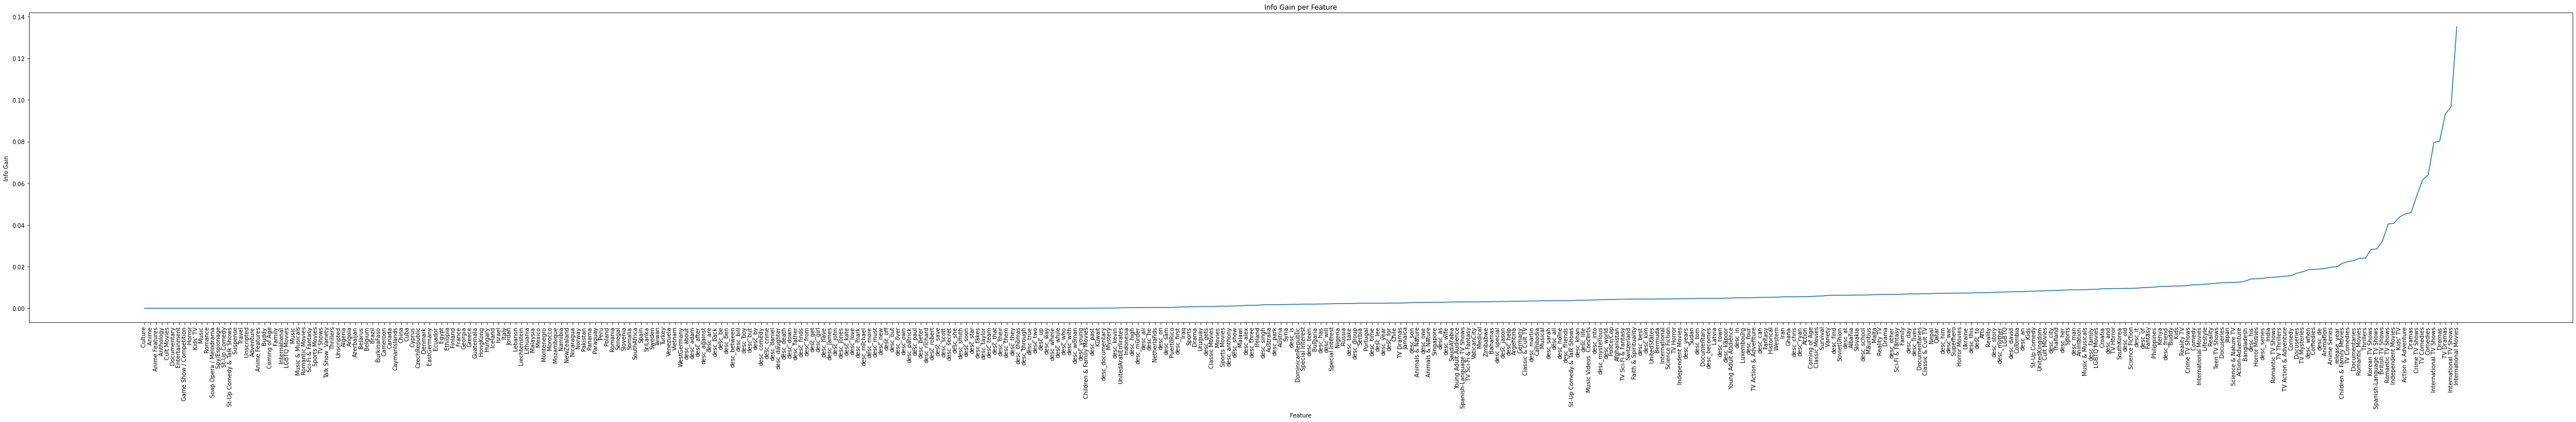

In [12]:
zipped = zip(df_preprocessed.drop('Movie', axis=1).columns, info_gains)
info_dic = dict(zipped)
info_dic = sorted(info_dic.items(), key=lambda i: i[1])
plt.figure(figsize=(80, 10))
plt.xticks(rotation=90)
plt.plot(dict(info_dic).keys(), dict(info_dic).values())
plt.xlabel('Feature')
plt.ylabel('Info Gain')
plt.title('Info Gain per Feature')
plt.show()

## 6 - Phase 2
First, we split the dataset into train and test sets.

In [31]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_preprocessed.drop('Movie', axis=1), df_preprocessed['Movie'], test_size=0.25, random_state=1)

### 6.1 - Model Definition and Prediction
Next, we define and train the model using the `DecisionTreeClassifier` of Sklearn. We also make predictions afterwards and compute the initial accuracy.

In [32]:
classifier = DecisionTreeClassifier()

classifier = classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
predictions

array([0, 1, 1, ..., 1, 0, 1])

Here, we compute the accuracy of the model on the test set.

In [33]:
print('Model accuracy on train data: %.2f%%' % (sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)) * 100))
print('Model accuracy on test data: %.2f%%' % (sklearn.metrics.accuracy_score(y_test, predictions) * 100))

Model accuracy on train data: 100.00%
Model accuracy on test data: 99.74%


<div style="color:green">
Note that even though we did not incorporate any cross-validation approaches, we're getting pretty decent results. The accuracy is well beyond 90% and the results are acceptable.
</div>

We also compute and show the confusion matrix of the test set's ground truth y's vs the prediction results.

In [34]:
CM = sklearn.metrics.confusion_matrix(y_test, predictions)
pd.DataFrame(CM, ['Actual True', 'Actual False'], columns=['Predicted True', 'Predicted False'])

,Predicted True,Predicted False
Actual True,622,5
Actual False,0,1289


<div style="color:green">
As obvious in the matrix, only a mere number of 5 datapoints (examples) have been falsely predicted in our model. The results show great accuracy, low bias, and low variance on the test data.
</div>

### 6.2 - Hyperparameters
- **max_depth**: The maximum depth of the dicision tree, determines the depth to which the tree is expanded down the root, for nodes that condition on certain criteria. The larger it is, the larger the risk of overfitting, and the lower it be, the higher the risk of underfitting could get.
- **min_samples_split**: This hyperparameter defines the number of minimum samples needed for node child generation.

In the following cell, we use the Sklearn `GridSearchCV` class to find the most suitable hyperparameters in the following sets for each hyperparameter:
- [10, 50) for max_depth
- [2, 5) for min_samples_split

In [35]:
params_dict = {
    'max_depth': range(10, 50),
    'min_samples_split': range(2, 5)
}
grid_model = sklearn.model_selection.GridSearchCV(classifier, params_dict, n_jobs=-1, verbose=1)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50),
                         'min_samples_split': range(2, 5)},
             verbose=1)

In [36]:
grid_model.best_params_

{'max_depth': 44, 'min_samples_split': 4}

<div style="color:green">
This shows that we could get the best tradeoff between bias and variance by using a max_depth value of 44 and a min_samples_split values of 4.
</div>
We use these hyperparameters with the model in the following cell:

In [37]:
classifier = DecisionTreeClassifier(max_depth=44, min_samples_split=4)

classifier = classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

print('Model accuracy on train data: %.2f%%' % (sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)) * 100))
print('Model accuracy on test data: %.2f%%' % (sklearn.metrics.accuracy_score(y_test, predictions) * 100))

Model accuracy on train data: 100.00%
Model accuracy on test data: 99.79%


<div style="color:green">
The accuracy is well beyond 90%.
</div>

### 6.3 - Problems (Questions)
#### 6.3.1 - Train/Test Ratio
The train/test split ratio is greatly important in model training. If test samples exhaust more than 50% of the total examples, "training" a model based on it actually makes no sense, since we're not providing the model with most of the data that we have during training. If the ratio of test data is too low, on the other hand, we'll essentially be left with little data to test the model against overfitting, as it's being trained on nearly all the datapoints, and thus decreases overall generalizability.

Here, we test a value of 98/2 for the train/test split ratio:

In [38]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_preprocessed.drop('Movie', axis=1), df_preprocessed['Movie'], test_size=0.02, random_state=1)

classifier = DecisionTreeClassifier(max_depth=44, min_samples_split=4)

classifier = classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

print('Model accuracy on train data: %.2f%%' % (sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)) * 100))
print('Model accuracy on test data: %.2f%%' % (sklearn.metrics.accuracy_score(y_test, predictions) * 100))

Model accuracy on train data: 100.00%
Model accuracy on test data: 100.00%


The model is obviously following the second path as described above, which is predicting new values based on almost all values seen during training. The fact that it's seen almost all the available datapoints during training makes it perform much better on the test set.

### 6.3.2 - Max-Depth tradeoff
If `max_depth`is set to values that are too low, the model will potentially have a hard time even generalizing to the train set, and thus most probably underfit. If it is too high, on the other hand, it may get too much specific to the noises in the train set, and thus get prone to overfitting.

Here we try a few different values to get the best one selected for the model:

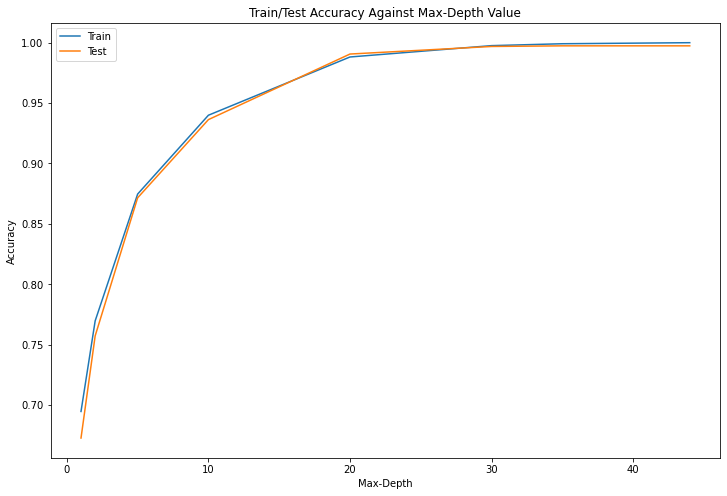

In [40]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_preprocessed.drop('Movie', axis=1), df_preprocessed['Movie'], test_size=0.25, random_state=1)

train_acc = []
test_acc = []

max_depth_values = [1, 2, 5, 10, 20, 30, 35, 44]
for max_depth in max_depth_values:
    classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=4)
    classifier = classifier.fit(X_train,y_train)
    predictions = classifier.predict(X_test)
    
    train_acc.append(sklearn.metrics.accuracy_score(y_train, classifier.predict(X_train)))
    test_acc.append(sklearn.metrics.accuracy_score(y_test, classifier.predict(X_test)))

plt.figure(figsize=(12,8))
plt.plot(max_depth_values, train_acc)
plt.plot(max_depth_values, test_acc)

plt.title('Train/Test Accuracy Against Max-Depth Value')
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

## 7 - Phase 3
### 7.1 - Random Forests and Hyperparams
We use a random forest model, which takes votes of several dicision tree classifiers for prediction of each example. This model has a number of hyper parameters, out of which 2 are explained below:
1. **n_estimators**: This hyperparamers is probably the most important for a random forest model. It determines the number of trees to be generated and votes across to make predictions.
2. **max_depth**: The maximum depth of each generated tree.

We plot changes to the prediction accuracy on the test set based on changes to these to hyperparameters in the following cell:

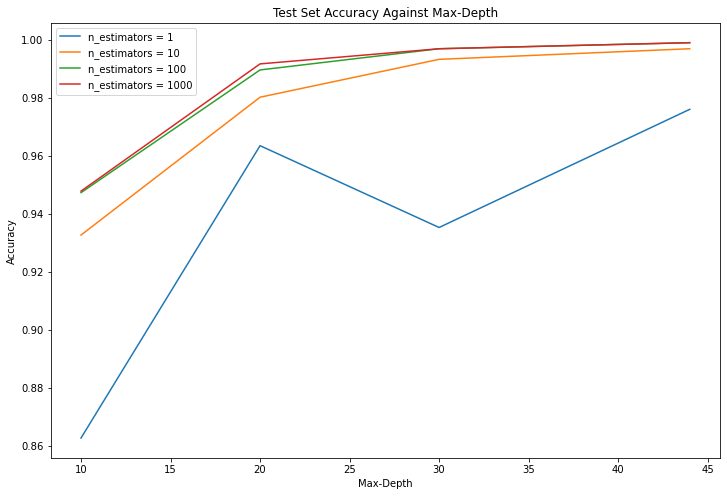

In [41]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_preprocessed.drop('Movie', axis=1), df_preprocessed['Movie'], test_size=0.25, random_state=1)

n_estimators_values = [1, 10, 100, 1000]
max_depth_values = [10, 20, 30, 44]

plt.figure(figsize=(12,8))

for n_estimators in n_estimators_values:
    test_acc = []
    for max_depth in max_depth_values:
        classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
        classifier.fit(X_train, y_train)

        test_acc.append(sklearn.metrics.accuracy_score(y_test, classifier.predict(X_test)))

    plt.plot(max_depth_values, test_acc)

plt.title('Test Set Accuracy Against Max-Depth')
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.legend(['n_estimators = {}'.format(i) for i in n_estimators_values])
plt.show()

<div style="color:green">
We're obviously getting better results with number of estimators set to 1000 and a max_depth of 44. This set of hyperparamers enable the new random forest model to overcome our single dicision tree model by an accuracy of nearly 99.89%.
</div>

In [42]:
classifier = RandomForestClassifier(n_estimators=1000, max_depth=44)
classifier.fit(X_train, y_train)

print('Random forest accuracy on the test set: %.4f%%' % (sklearn.metrics.accuracy_score(y_test, classifier.predict(X_test)) * 100))

Random forest accuracy on the test set: 99.8956%


### 7.2 - Bias/Variance Tradeoff
A random forest model, given enough number of estimators, would intuitively have both lower variance and lower bias in prediction/training that a single dicision tree. This is a result of the fact that a random forest takes votes of many different dicision trees based on several chosen features and makes predictions based on that. According to the expected value of the accuracy, training a random forest model would result in a better tradeoff between variance and bias.

**Note**: The results of our tests, also, obviously suggest that the described intuition is correct in action.

## Conclusion
In this notebook, we trained and tested several ML models including several dicision tree models along with a number of random forests. The results of these models were also compared and rated, taking accuracy into account. Random forests were also clearly overcame single dicision tree models as shown in the final tests, if well hyperparameterized.

We also took an overall accuracy of approximately 99.89% on our most successful model, and set a pretty decent tradeoff between variance/bias of the models.